In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [51]:
digits = tf.keras.datasets.mnist.load_data()

In [52]:
digits_a, digits_b = digits

In [53]:
digits_X, digits_y = digits_b
len(digits_X)

10000

In [54]:
digits_X = np.array(digits_X)
digits_y = np.array(digits_y)

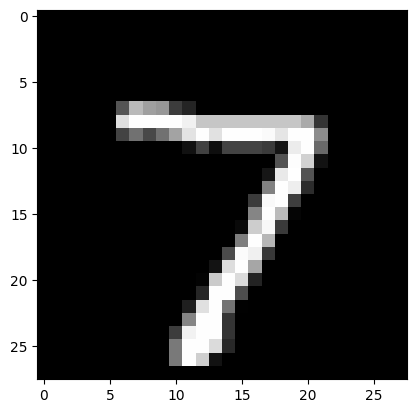

In [55]:
plt.imshow(digits_X[0], cmap="gray")

In [56]:
fashion = tf.keras.datasets.fashion_mnist.load_data()

In [57]:
fashion_a, fashion_b = fashion

In [58]:
fashion_X, fashion_y = fashion_a
len(fashion_X)

60000

In [59]:
fashion_X = np.array(fashion_X)
fashion_y = np.array(fashion_y)

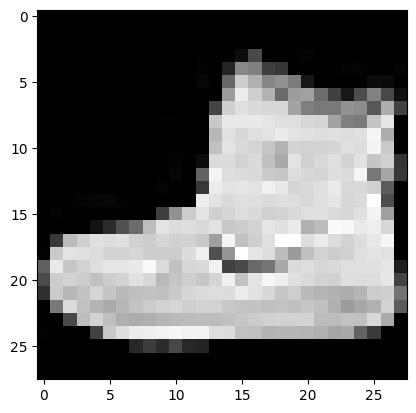

In [60]:
plt.imshow(fashion_X[0], cmap="gray")

In [61]:
np.random.seed(42)
idx_L = np.random.randint(0, len(fashion_X), len(fashion_X) * 2)
idx_R = np.random.randint(0, len(fashion_X), len(fashion_X) * 2)
idx_M = np.random.randint(0, len(digits_X), len(fashion_X) * 2)

In [62]:
L_X, L_y = fashion_X[idx_L], fashion_y[idx_L]
M_X, M_y = digits_X[idx_M], digits_y[idx_M]
R_X, R_y = fashion_X[idx_R], fashion_y[idx_R]

In [63]:
from tensorflow.keras.utils import to_categorical

X = np.concatenate([L_X, M_X, R_X], axis=2)
y = to_categorical(np.stack(L_y * (M_y % 2 == 0) + R_y * (M_y % 2 != 0)))

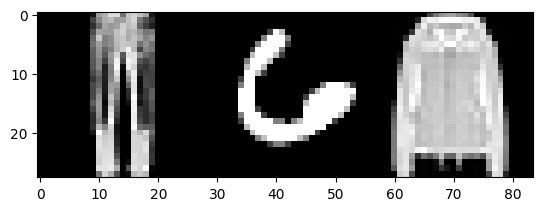

In [64]:
plt.imshow(X[0], cmap="gray")

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

In [110]:
from tensorflow.keras import layers, models, losses
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

model = models.Sequential()
model.add(
    layers.Conv2D(
        64, (3, 3), padding="same", activation="relu", input_shape=(28, 84, 1)
    )
)
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(
    layers.Conv2D(
        72, (3, 3), padding="same", activation="relu", input_shape=(14, 42, 64)
    )
)
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9
)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

In [111]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
2625/2625 [==============================] - 172s 65ms/step - loss: 0.8880 - accuracy: 0.6885 - val_loss: 0.4895 - val_accuracy: 0.8202
Epoch 2/5
2625/2625 [==============================] - 234s 89ms/step - loss: 0.5079 - accuracy: 0.8214 - val_loss: 0.3935 - val_accuracy: 0.8588
Epoch 3/5
2625/2625 [==============================] - 231s 88ms/step - loss: 0.4096 - accuracy: 0.8538 - val_loss: 0.3439 - val_accuracy: 0.8751
Epoch 4/5
2625/2625 [==============================] - 229s 87ms/step - loss: 0.3546 - accuracy: 0.8746 - val_loss: 0.3092 - val_accuracy: 0.8886
Epoch 5/5
2625/2625 [==============================] - 205s 78ms/step - loss: 0.3179 - accuracy: 0.8870 - val_loss: 0.3287 - val_accuracy: 0.8809


In [112]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
true_classes = np.argmax(y_test, axis=1)

np.mean(predicted_classes == true_classes) * 100

563/563 [==============================] - 8s 14ms/step


88.4